In [1]:
import sys
import os

%reload_ext autoreload
%autoreload 2

EZAI_ROOT=os.path.join(os.path.expanduser('~'),'projects','ezai')
if not EZAI_ROOT in sys.path:
    sys.path.append(EZAI_ROOT)
import ezai

from ezai.util import util
util.m_info([ezai]) 

ezai 0.1.0-dev


In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import display as ipd

print('Python ', sys.version)
print(sys.executable)

util.m_info([pd,np,mpl,sns])

import math

Python  3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]
/opt/conda/envs/ezai/bin/python
pandas 1.1.0
numpy 1.19.1
matplotlib 3.3.0
seaborn 0.10.1


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width=None

In [5]:
from ezai.data import ritis
from ezai.util import vis_util
from ezai.util import df_util
from ezai.util import dict_util
from ezai.data import temporal

In [3]:
exp_id = 'n3_1'
exp_iid = 'local_1'
#expdid = 'pems_d5'
exp_did = 'samiul_i75'
exp_out = os.path.join(os.path.expanduser('~'),'traffic_flow_exp','out',exp_id,exp_iid)
exp_tid = 1

In [6]:
def exp_folders_dict(out_folder,exp_tid):
    efd = dict_util.DictObj()
    for kind in ['logs','models','preds','confs','metrics','autotune']:
        efd[kind]=os.path.join(out_folder, kind)
    efd.autotune = os.path.join(efd.autotune, '{}'.format(exp_tid), 'run_0')
    return efd

efd = exp_folders_dict(exp_out,exp_tid)
#modelpath=os.path.join(efd.models, '{}'.format(exp_tid))


#logs_folder = os.path.join(out_folder, 'logs')

#models_folder = os.path.join(out_folder, 'models')

#modelpath = os.path.join(models_folder, '{}'.format(exptid))

#preds_folder = os.path.join(out_folder, 'preds')

#confs_folder = os.path.join(out_folder, 'confs')

#metrics_folder = os.path.join(out_folder, 'metrics')

#metrics_filename = os.path.join(metrics_folder, '{}.csv'.format(exptid))

#autotune_folder = os.path.join(out_folder, 'autotune', '{}'.format(exptid), 'run_0')


ezai - I - Making empty DictObj because not given a dict or a json filename


In [7]:
from glob import glob

# Read all metrics Files

# metrics_filename = os.path.join(efd.metrics, '{}.csv'.format(exp_tid))
# read all metrics
metrics_files = glob(os.path.join(efd.metrics, '*.csv'))
metrics_df = pd.concat(
    [pd.read_csv(file, index_col=None, header=0) for file in metrics_files],
    axis=0,
    ignore_index=True)
#metrics_df.set_index('exptid',inplace=True)
metrics_df.sort_values('exptid',inplace=True)
metrics_df.reset_index(drop=True,inplace=True)
#metrics_df.t_train # /= 60. # convert to minutes
display(metrics_df)

,exptid,id,t_train,t_autotune,mse,mae,mape,smape
0,1,9816,11.576814,20.908006,320.692540,14.573666,20.186996,9.284237
1,2,9815,7.568590,17.514807,60.349106,6.403877,35.168970,17.980891
2,3,9816,11.471594,21.461180,10.186683,2.521020,3.515601,1.725907
3,4,9815,5.392357,14.929871,366.165800,17.895180,94.510520,89.767492
4,5,9816,11.649301,20.531290,1847.364500,37.407307,51.781040,19.424842
...,...,...,...,...,...,...,...,...
571,572,9830,10.819215,20.821106,11.889409,2.565112,4.654436,2.410323
572,573,9831,13.235525,22.618147,7.968771,2.594972,3.663872,1.826406
573,574,9830,12.151802,20.837759,26.249100,4.239901,7.704324,4.078944
574,575,9831,10.160662,19.855488,12.367199,2.955817,4.263332,2.068879


In [11]:
# Check if we have missing experiments

exptid_missing = [i for i in range(1,1152) if i not in metrics_df.exptid.unique()]
print(exptid_missing)

[577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776,

In [40]:
# find unique zone ids
id_list = metrics_df.id.unique().astype(str).tolist()
print(id_list)

[9816, 9815, 9822, 9823, 9824, 9825, 9826, 9827, 9828, 9829, 9830, 9831]


In [165]:
# load metadata
filetype = 'csv'
rd = ritis.RITISDetector(exp_did).load_raw(kind=['zone'],filetype=filetype)
rd.filter_by_common_id()

In [166]:
# map the detectors # split in two cells as query busts some time
map_df = rd.df.meta.query('id in @id_list').loc[:,['id','lat','lon']]

<Figure size 432x288 with 0 Axes>

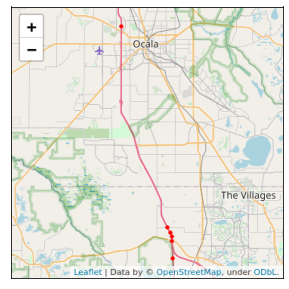

In [50]:
fmap = vis_util.map_with_folium(map_df)
filename='n3_1-out-{}.png'.format(exp_did)
fpng = vis_util.folium_to_png(fmap,filename)
vis_util.show_image_file(filename,width = 5, height = 5)

In [180]:
# read all configs
confs_dict = {}

#conf_files = glob(os_path.join(confs_folder, '*.json'))
for exptid in metrics_df.exptid:
    confs_dict[exptid] = dict_util.load_dict_from_json(
        os.path.join(efd.confs, '{}.json'.format(exptid)))
confs_df = pd.DataFrame.from_dict(confs_dict, orient='index')
confs_df.reset_index(inplace=True)
#display(confs_df)
confs_df.rename(columns={'index': 'exptid'}, inplace=True)
#confs_df.sort_values('exptid', inplace=True)
#confs_df.reset_index(drop=True, inplace=True)
#confs_df['df'] = ''
confs_df.loc[confs_df.x_cols.astype(str).str.contains('volume'), 'derived_features'] += '3'
#confs_df.loc[confs_df.x_cols.astype(str).str.contains('0_speed'), 'df'] += 's'
#confs_df.loc[confs_df.x_cols.astype(str).str.contains('dow'), 'df'] += 't'
#confs_df['df'] += 'f'

#confs_df.drop(columns=[
#    'source_data','n_agg', 'n_batch_size', 'n_vy', 'n_tx', 'n_ty', 'n_epochs','h',
#    'trim_partial_weeks', 'months', 'bidir', 'id_col', 'dt_col', 'los_fname', 'met_fnames','y_cols',
#    'road_list','direction_list','n_x_vars_list','n_agg_list','mclass_list','derived_features_list','id_list',
#    'modelpath','weekdays'
#],
#              inplace=True)
display(confs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   exptid              576 non-null    int64 
 1   n_tx                576 non-null    int64 
 2   n_ty                576 non-null    int64 
 3   n_vx                576 non-null    int64 
 4   n_vy                576 non-null    int64 
 5   n_agg               576 non-null    int64 
 6   mclass              576 non-null    object
 7   n_epochs            576 non-null    int64 
 8   n_batch_size        576 non-null    int64 
 9   lay_fname           576 non-null    object
 10  los_fname           576 non-null    object
 11  opt_fname           576 non-null    object
 12  met_fnames          576 non-null    object
 13  bidir               576 non-null    bool  
 14  source_data         576 non-null    object
 15  road                576 non-null    object
 16  direction           576 no

None

In [171]:
metrics_df = pd.merge(metrics_df,confs_df,on='exptid)

In [176]:
metrics_df = metrics_df.rename(columns={'id_x':'id'})

In [177]:
metrics_df.head()

,exptid,id,t_train,t_autotune,mse,mae,mape,smape,n_tx,n_ty,...,weekdays,trim_partial_weeks,n_tx_duration,n_tx_step,n_ty_step,xy_cols,act_fname,n_units,id_prev,id_next
0,1,9816,11.576814,20.908006,320.692540,14.573666,20.186996,9.284237,24,2,...,"[0, 1, 2, 3, 4]",True,0,1,6,[speed],relu,24,NaN,NaN
1,2,9815,7.568590,17.514807,60.349106,6.403877,35.168970,17.980891,24,2,...,"[0, 1, 2, 3, 4]",True,0,1,6,"[speed, volume, occupancy]",relu,48,NaN,NaN
2,3,9816,11.471594,21.461180,10.186683,2.521020,3.515601,1.725907,24,2,...,"[0, 1, 2, 3, 4]",True,0,1,6,"[speed, volume, occupancy]",relu,48,NaN,NaN
3,4,9815,5.392357,14.929871,366.165800,17.895180,94.510520,89.767492,24,2,...,"[0, 1, 2, 3, 4]",True,0,2,6,[speed],relu,24,NaN,NaN
4,5,9816,11.649301,20.531290,1847.364500,37.407307,51.781040,19.424842,24,2,...,"[0, 1, 2, 3, 4]",True,0,2,6,[speed],relu,36,NaN,NaN


In [172]:
#Check how many experiments of each class:
g_df = confs_df.groupby(['mclass','derived_features'])
display(g_df.exptid.count())

mclass        derived_features
BiLSTM_Keras  f                    1
GRU_Keras     f                   36
              f3                  36
              sf                  36
              sf3                 36
              stf                 36
              stf3                36
              tf                  36
              tf3                 36
LSTM_Keras    f                   35
              f3                  36
              sf                  36
              sf3                 36
              stf                 36
              stf3                36
              tf                  36
              tf3                 36
Name: exptid, dtype: int64

,exptid,id_x,t_train,t_autotune,mse,mae,mape,smape,n_tx,n_ty,...,weekdays,trim_partial_weeks,n_tx_duration,n_tx_step,n_ty_step,xy_cols,act_fname,n_units,id_prev,id_next
0,1,9816,11.576814,20.908006,320.692540,14.573666,20.186996,9.284237,24,2,...,"[0, 1, 2, 3, 4]",True,0,1,6,[speed],relu,24,NaN,NaN
1,2,9815,7.568590,17.514807,60.349106,6.403877,35.168970,17.980891,24,2,...,"[0, 1, 2, 3, 4]",True,0,1,6,"[speed, volume, occupancy]",relu,48,NaN,NaN
2,3,9816,11.471594,21.461180,10.186683,2.521020,3.515601,1.725907,24,2,...,"[0, 1, 2, 3, 4]",True,0,1,6,"[speed, volume, occupancy]",relu,48,NaN,NaN
3,4,9815,5.392357,14.929871,366.165800,17.895180,94.510520,89.767492,24,2,...,"[0, 1, 2, 3, 4]",True,0,2,6,[speed],relu,24,NaN,NaN
4,5,9816,11.649301,20.531290,1847.364500,37.407307,51.781040,19.424842,24,2,...,"[0, 1, 2, 3, 4]",True,0,2,6,[speed],relu,36,NaN,NaN


In [ ]:
# first load original data
# show the data temporal and spatial
# show the tests


In [ ]:
# first select experiments from conf.


In [167]:
gru_df = pd.merge(g_df.get_group(('GRU_Keras','f'))[['exptid']], metrics_df,how='left',on='exptid')
lstm_df = pd.merge(g_df.get_group(('LSTM_Keras','f'))[['exptid']], metrics_df,how='left',on='exptid')
gru_s_df = pd.merge(g_df.get_group(('GRU_Keras','sf'))[['exptid']], metrics_df,how='left',on='exptid')
lstm_s_df = pd.merge(g_df.get_group(('LSTM_Keras','sf'))[['exptid']], metrics_df,how='left',on='exptid')
gru_t_df = pd.merge(g_df.get_group(('GRU_Keras','tf'))[['exptid']], metrics_df,how='left',on='exptid')
lstm_t_df = pd.merge(g_df.get_group(('LSTM_Keras','tf'))[['exptid']], metrics_df,how='left',on='exptid')
gru_st_df = pd.merge(g_df.get_group(('GRU_Keras','stf'))[['exptid']], metrics_df,how='left',on='exptid')
lstm_st_df = pd.merge(g_df.get_group(('LSTM_Keras','stf'))[['exptid']], metrics_df,how='left',on='exptid')


In [168]:
for met in ['t_train','t_autotune','mape','smape']:
    df=pd.DataFrame()
    df['id']=gru_df['id']

    df = pd.merge(df,gru_df[['id',met]],how='left',on='id')
    df.rename(columns={met:'GRU'}, inplace=True)
    df = pd.merge(df,gru_s_df[['id',met]],how='left',on='id')
    df.rename(columns={met:'GRU_S'}, inplace=True)
    df = pd.merge(df,gru_t_df[['id',met]],how='left',on='id')
    df.rename(columns={met:'GRU_T'}, inplace=True)
    df = pd.merge(df,gru_st_df[['id',met]],how='left',on='id')
    df.rename(columns={met:'GRU_ST'}, inplace=True)
    
    df = pd.merge(df,lstm_df[['id',met]],how='left',on='id')
    df.rename(columns={met:'LSTM'}, inplace=True)
    df = pd.merge(df,lstm_s_df[['id',met]],how='left',on='id')
    df.rename(columns={met:'LSTM_S'}, inplace=True)
    df = pd.merge(df,lstm_t_df[['id',met]],how='left',on='id')
    df.rename(columns={met:'LSTM_T'}, inplace=True)
    df = pd.merge(df,lstm_st_df[['id',met]],how='left',on='id')
    df.rename(columns={met:'LSTM_ST'}, inplace=True)
    
    df=df.append({'id':'avg','GRU':df.GRU.mean(),
                  'GRU_S':df.GRU_S.mean(),
                  'GRU_T':df.GRU_T.mean(),
                  'GRU_ST':df.GRU_ST.mean(),
                  'LSTM':df.LSTM.mean(),
                  'LSTM_S':df.LSTM_S.mean(),
                  'LSTM_T':df.LSTM_T.mean(),
                  'LSTM_ST':df.LSTM_ST.mean()
                  },ignore_index=True)
    
    ax1=df.plot(x='id',kind='bar',figsize=(14,4),width=0.8)
    ax1.set_ylabel(met)
    ax1.legend(loc='upper right')
    plt.savefig(os_path.join('..','images','{}-bar.png'.format(met)), bbox_inches='tight')
    plt.show()
    
    #ax2=df.plot(x='id',kind='box',figsize=(14,4))
    ax2=sns.violinplot(data=df).set_ylabel(met)
    plt.savefig(os_path.join('..','images','{}-v.png'.format(met)), bbox_inches='tight')
    #ax2.set_ylabel(met)
    plt.show()    

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f1fdd883ef0> (for post_execute):


KeyboardInterrupt: 

In [198]:
# select the data
metrics_df = metrics_df.query(('(n_layers==1) & '
                              '(derived_features=="f") & '
                              '(bidir==False) & '
                              '(mclass=="GRU_Keras")'
                              ) 
                             )
print(metrics_df.shape)

(36, 42)


In [199]:
metrics_pivot = metrics_df.pivot(index='id',columns='n_agg',values=['mae','mse','mape','smape']).dropna()
metrics_pivot.columns.names=['metric','n_agg']
metrics_pivot.index.names=['zone.id']
metrics_pivot.columns.set_levels(['5','10','15'],level=1,inplace=True)
metrics_pivot.columns.set_levels(['MAE','MSE','MAPE','SMAPE'],level=0,inplace=True)

In [200]:
vis_util.show_df(metrics_pivot)